In [1]:
# Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing Python Portfolio Performance Libraries

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import DiscreteAllocation
from pypfopt import objective_functions
from pypfopt import EfficientSemivariance

In [5]:
stocks = ['RELIANCE.BO','NTPC.BO','SBIN.BO','LT.BO','TATASTEEL.BO',
        'VEDL.BO','SUZLON.BO','INDHOTEL.BO','BSOFT.BO','BLUESTARCO.BO']
data = yf.download (stocks, start = '2024-01-01', end = '2024-12-31')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


In [6]:
data

Ticker,BLUESTARCO.BO,BSOFT.BO,INDHOTEL.BO,LT.BO,NTPC.BO,RELIANCE.BO,SBIN.BO,SUZLON.BO,TATASTEEL.BO,VEDL.BO
Date,,,,,,,,,,
2024-01-01,944.694397,698.064026,434.892670,3494.880859,302.659515,1286.164185,631.360962,38.480000,137.138046,228.473938
2024-01-02,946.885376,683.200012,437.086060,3412.280029,299.285736,1296.617920,628.508789,38.250000,136.794968,229.228989
2024-01-03,938.022034,682.006897,450.296356,3414.214844,299.481354,1282.737427,632.787048,37.830002,132.628876,234.203537
2024-01-04,931.847534,684.045105,461.363098,3432.173584,310.091522,1289.913574,632.098633,38.700001,131.599609,236.379929
2024-01-05,939.864380,709.547668,454.533630,3487.637695,308.037964,1294.557007,631.262573,40.630001,131.011444,236.069000
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,2003.949951,573.750000,859.799988,3640.649902,331.068359,1222.099976,820.950012,63.869999,141.699997,464.600006
2024-12-24,1984.000000,579.299988,863.250000,3642.300049,332.854462,1223.500000,811.849976,64.820000,140.350006,462.200012
2024-12-26,2035.699951,569.950012,868.450012,3628.250000,331.862213,1216.599976,811.650024,64.330002,140.350006,460.399994


Text(0.5, 1.0, 'Stock Prices for 2024')

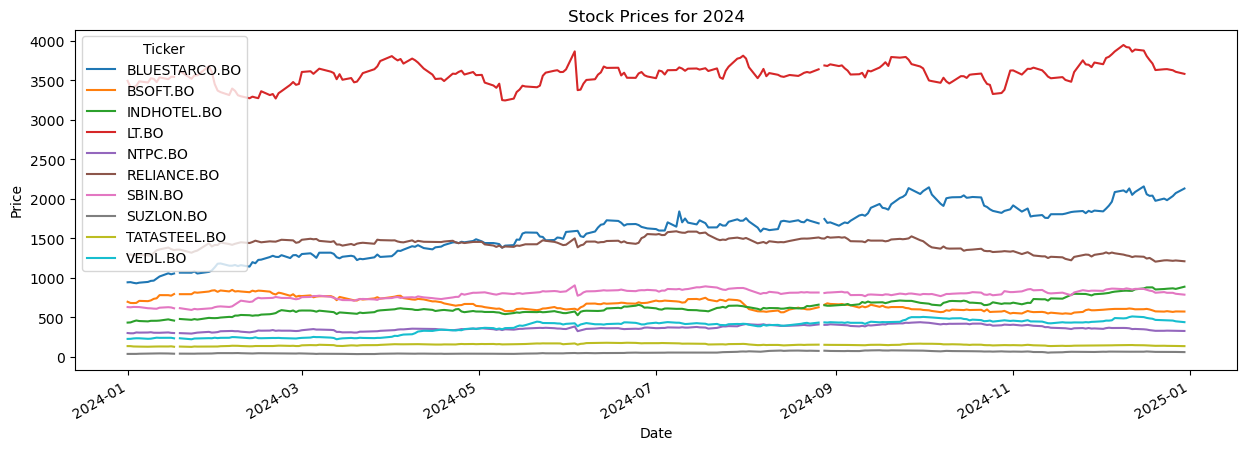

In [7]:
# Plotting the prices of the data for the given period

data.plot(figsize = (15,5))
plt.xlabel ("Date")
plt.ylabel ("Price")
plt.title ("Stock Prices for 2024")

In [8]:
# Calculating the CAPM returns for the assets

mu = expected_returns.capm_return(data)
mu

Ticker
BLUESTARCO.BO    0.273741
BSOFT.BO         0.314762
INDHOTEL.BO      0.322634
LT.BO            0.308470
NTPC.BO          0.386218
RELIANCE.BO      0.258777
SBIN.BO          0.341691
SUZLON.BO        0.434885
TATASTEEL.BO     0.382777
VEDL.BO          0.417481
Name: mkt, dtype: float64

<Axes: ylabel='Ticker'>

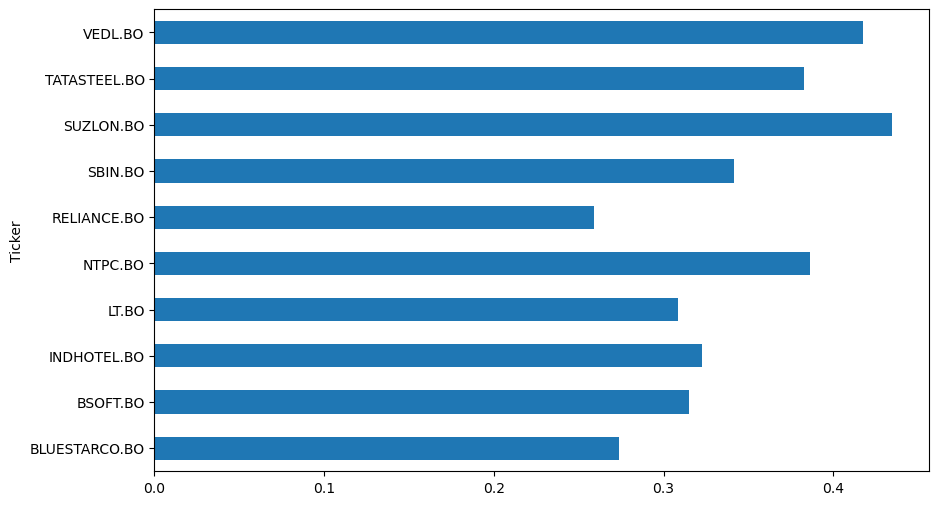

In [9]:
# Plotting the CAPM returns

mu.plot.barh(figsize = (10,6))

In [10]:
# Calculating Covariances for the stocks

S = CovarianceShrinkage(data).ledoit_wolf()
S

Ticker,BLUESTARCO.BO,BSOFT.BO,INDHOTEL.BO,LT.BO,NTPC.BO,RELIANCE.BO,SBIN.BO,SUZLON.BO,TATASTEEL.BO,VEDL.BO
Ticker,,,,,,,,,,
BLUESTARCO.BO,0.137579,0.013568,0.018717,0.016288,0.017024,0.013363,0.016429,0.032874,0.024834,0.020682
BSOFT.BO,0.013568,0.119995,0.030186,0.021137,0.022579,0.023456,0.023444,0.035661,0.033117,0.032665
INDHOTEL.BO,0.018717,0.030186,0.104534,0.027948,0.032717,0.021832,0.025408,0.036622,0.030874,0.035738
LT.BO,0.016288,0.021137,0.027948,0.084643,0.044629,0.031944,0.038419,0.020844,0.035327,0.027822
NTPC.BO,0.017024,0.022579,0.032717,0.044629,0.101755,0.036410,0.050568,0.035797,0.046130,0.046076
RELIANCE.BO,0.013363,0.023456,0.021832,0.031944,0.036410,0.059824,0.034045,0.021960,0.027925,0.028196
SBIN.BO,0.016429,0.023444,0.025408,0.038419,0.050568,0.034045,0.089842,0.029745,0.038324,0.039003
SUZLON.BO,0.032874,0.035661,0.036622,0.020844,0.035797,0.021960,0.029745,0.192939,0.038902,0.041412
TATASTEEL.BO,0.024834,0.033117,0.030874,0.035327,0.046130,0.027925,0.038324,0.038902,0.091740,0.062740


<Axes: >

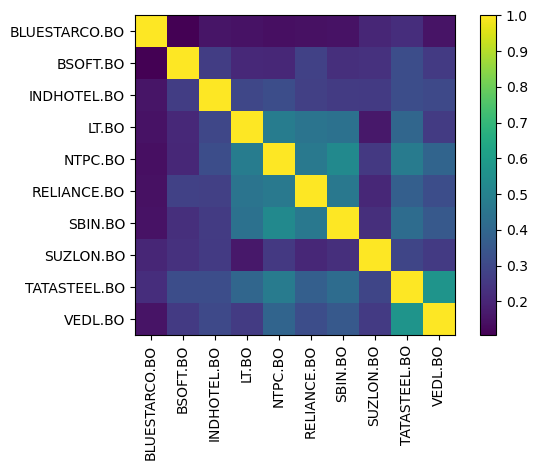

In [11]:
# Plotting Covariance

plotting.plot_covariance(S, plot_correlation = True)

In [12]:
# Constructing Global Minimum Variance Portfolio

ef = EfficientFrontier(mu,S)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('BLUESTARCO.BO', 0.14973),
             ('BSOFT.BO', 0.11446),
             ('INDHOTEL.BO', 0.11983),
             ('LT.BO', 0.12425),
             ('NTPC.BO', 0.00397),
             ('RELIANCE.BO', 0.29235),
             ('SBIN.BO', 0.08445),
             ('SUZLON.BO', 0.03398),
             ('TATASTEEL.BO', 0.04657),
             ('VEDL.BO', 0.03041)])

In [13]:
ef.portfolio_performance(verbose=True)

Expected annual return: 30.5%
Annual volatility: 18.6%
Sharpe Ratio: 1.64


(0.3053453092270957, 0.18623582764016247, 1.639562661471733)

In [14]:
# Discrete Allocation for Global Minimum Variance Portfolio

latest_prices = get_latest_prices(data)
weights = weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 100000)
allocation, leftover = da.lp_portfolio()
print("Discrete Allocation:", allocation)
print("Balance Amount: INR", leftover)

Discrete Allocation: {'BLUESTARCO.BO': 7, 'BSOFT.BO': 20, 'INDHOTEL.BO': 14, 'LT.BO': 3, 'NTPC.BO': 1, 'RELIANCE.BO': 25, 'SBIN.BO': 11, 'SUZLON.BO': 55, 'TATASTEEL.BO': 34, 'VEDL.BO': 7}
Balance Amount: INR 1.8121717275644187


In [15]:
# Adding Sector Constraints

sector_mapper = {
    'BSOFT.BO': 'IT SERVICES',
    'RELIANCE.BO': 'CONGLOMERATE',
    'SBIN.BO': 'BANK',
    'INDHOTEL.BO': 'HOTEL',
    'VEDL.BO': 'MINING',
    'TATASTEEL.BO': 'STEEL',
    'NTPC.BO': 'POWER',
    'BLUESTARCO.BO': 'HOME APPLIANCES',
    'SUZLON.BO': 'ENERGY',
    'LT.BO': 'ENGINEERING'
}

sector_lower = {
    'IT SERVICES': 0.10,
    'CONGLOMERATE': 0.05,
    'BANK': 0.05,
    'HOTEL': 0.10,
    'MINING': 0.10,
    'STEEL': 0.05,
    'POWER': 0.05,
    'HOME APPLIANCES': 0.10,
    'ENERGY': 0.20,
    'ENGINEERING': 0.05
}

sector_upper = {
    'IT SERVICES': 0.20,
    'CONGLOMERATE': 0.10,
    'BANK': 0.10,
    'HOTEL': 0.20,
    'MINING': 0.20,
    'STEEL': 0.10,
    'POWER': 0.10,
    'HOME APPLIANCES': 0.20,
    'ENERGY': 0.20,
    'ENGINEERING': 0.10
}

In [16]:
# Constructing a Max Sharpe Portfolio with Sector Constraints

mu = expected_returns.capm_return(data)
S = risk_models.CovarianceShrinkage(data).ledoit_wolf()

ef = EfficientFrontier(mu, S)  
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

ef.max_sharpe()
weights = ef.clean_weights()

In [17]:
weights

OrderedDict([('BLUESTARCO.BO', 0.1),
             ('BSOFT.BO', 0.1),
             ('INDHOTEL.BO', 0.1),
             ('LT.BO', 0.09185),
             ('NTPC.BO', 0.09678),
             ('RELIANCE.BO', 0.05001),
             ('SBIN.BO', 0.08736),
             ('SUZLON.BO', 0.2),
             ('TATASTEEL.BO', 0.07401),
             ('VEDL.BO', 0.1)])

In [18]:
ef.portfolio_performance(verbose=True)

Expected annual return: 35.7%
Annual volatility: 20.8%
Sharpe Ratio: 1.71


(0.35666716937245535, 0.20819061700960464, 1.7131760042576794)

In [19]:
# Maximising return for a given risk using L2 regularistion

ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma = 1)
ef.efficient_risk(target_volatility=0.21)
weights = ef.clean_weights()
weights

OrderedDict([('BLUESTARCO.BO', 0.1),
             ('BSOFT.BO', 0.1),
             ('INDHOTEL.BO', 0.1),
             ('LT.BO', 0.06543),
             ('NTPC.BO', 0.09841),
             ('RELIANCE.BO', 0.05),
             ('SBIN.BO', 0.07932),
             ('SUZLON.BO', 0.2),
             ('TATASTEEL.BO', 0.09613),
             ('VEDL.BO', 0.11071)])

<Axes: >

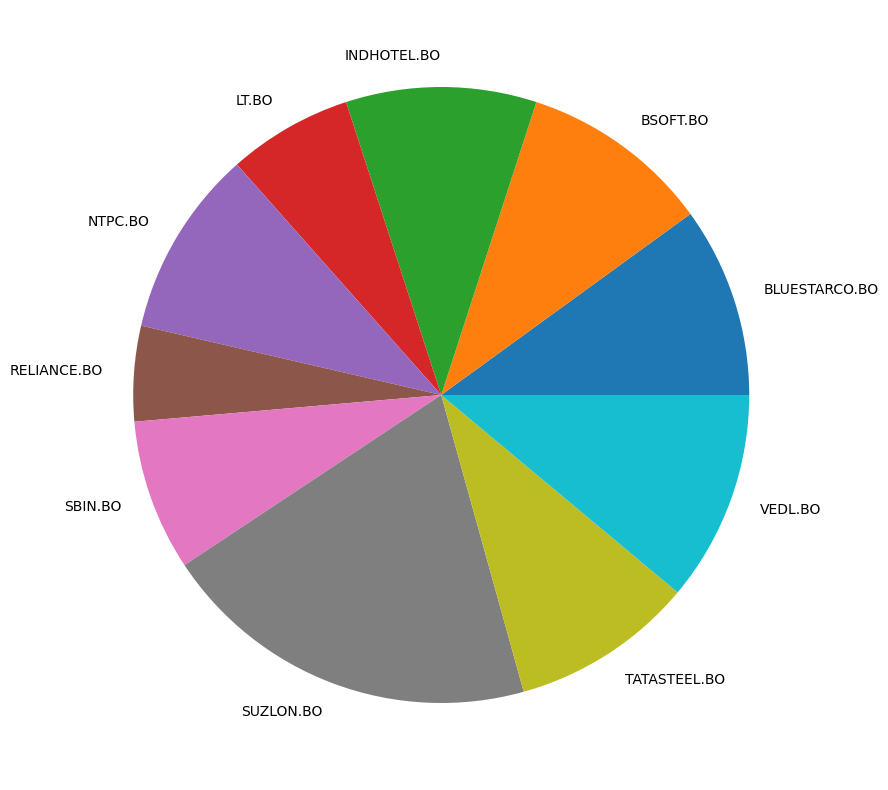

In [20]:
pd.Series(weights).plot.pie(figsize=(10, 10))

In [21]:
ef.portfolio_performance(verbose = True)

Expected annual return: 35.9%
Annual volatility: 21.0%
Sharpe Ratio: 1.71


(0.35933936707583664, 0.20999999992145257, 1.7111398438582965)

In [22]:
# Minimise risk for a given return, market-neutral

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('BLUESTARCO.BO', -0.15129),
             ('BSOFT.BO', -0.06395),
             ('INDHOTEL.BO', -0.04744),
             ('LT.BO', -0.07739),
             ('NTPC.BO', 0.09821),
             ('RELIANCE.BO', -0.19668),
             ('SBIN.BO', -0.00362),
             ('SUZLON.BO', 0.19315),
             ('TATASTEEL.BO', 0.08733),
             ('VEDL.BO', 0.16168)])

In [23]:
ef.portfolio_performance(verbose=True)

Expected annual return: 7.0%
Annual volatility: 12.7%
Sharpe Ratio: 0.55


(0.07, 0.1272677517648288, 0.550021502142579)

<Axes: >

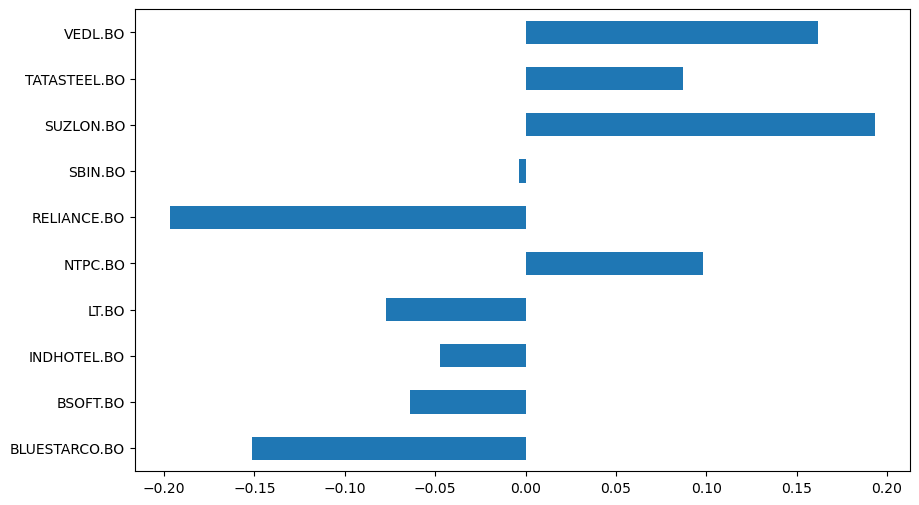

In [24]:
pd.Series(weights).plot.barh(figsize=(10,6))

In [25]:
# Semi Variance Optimization

semicov = risk_models.semicovariance(data)

In [26]:
semicov

Ticker,BLUESTARCO.BO,BSOFT.BO,INDHOTEL.BO,LT.BO,NTPC.BO,RELIANCE.BO,SBIN.BO,SUZLON.BO,TATASTEEL.BO,VEDL.BO
Ticker,,,,,,,,,,
BLUESTARCO.BO,0.052840,0.023611,0.017980,0.015947,0.019048,0.014808,0.015347,0.031381,0.022847,0.022345
BSOFT.BO,0.023611,0.060453,0.023174,0.022187,0.024537,0.018070,0.021031,0.034463,0.027787,0.027169
INDHOTEL.BO,0.017980,0.023174,0.036025,0.024056,0.028158,0.019773,0.025390,0.028911,0.025633,0.027433
LT.BO,0.015947,0.022187,0.024056,0.044571,0.037788,0.025121,0.032325,0.026719,0.027851,0.030530
NTPC.BO,0.019048,0.024537,0.028158,0.037788,0.056142,0.027492,0.038569,0.034418,0.033872,0.036638
RELIANCE.BO,0.014808,0.018070,0.019773,0.025121,0.027492,0.026647,0.024094,0.024508,0.022810,0.023617
SBIN.BO,0.015347,0.021031,0.025390,0.032325,0.038569,0.024094,0.044226,0.029871,0.029105,0.032518
SUZLON.BO,0.031381,0.034463,0.028911,0.026719,0.034418,0.024508,0.029871,0.084196,0.036120,0.037588
TATASTEEL.BO,0.022847,0.027787,0.025633,0.027851,0.033872,0.022810,0.029105,0.036120,0.044127,0.037183


<Axes: >

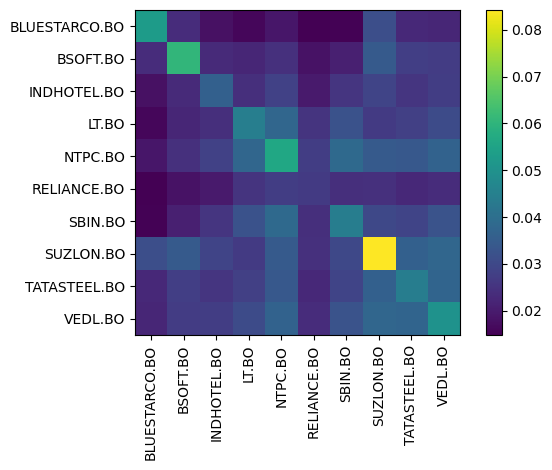

In [27]:
# Plotting Semicovariance

plotting.plot_covariance(semicov)

In [28]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.2)
weights = ef.clean_weights()
weights

OrderedDict([('BLUESTARCO.BO', 0.17759),
             ('BSOFT.BO', 0.06359),
             ('INDHOTEL.BO', 0.18493),
             ('LT.BO', 0.0),
             ('NTPC.BO', 0.0),
             ('RELIANCE.BO', 0.5676),
             ('SBIN.BO', 0.00628),
             ('SUZLON.BO', 0.0),
             ('TATASTEEL.BO', 0.0),
             ('VEDL.BO', 0.0)])

In [29]:
ef.portfolio_performance(verbose=True);

Expected annual return: 27.7%
Annual volatility: 15.1%
Sharpe Ratio: 1.84


In [30]:
returns = expected_returns.returns_from_prices(data)
returns = returns.dropna()

In [31]:
es = EfficientSemivariance(mu, returns)
es.efficient_return(0.3)
es.portfolio_performance(verbose=True)

Expected annual return: 30.0%
Annual semi-deviation: 13.6%
Sortino Ratio: 2.20


(0.29999963170760396, 0.1361544686846597, 2.2033770511228505)

In [32]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True)

Expected annual return: 34.7%
Annual volatility: 19.8%
Sharpe Ratio: 1.75


(0.3465937906857841, 0.19841659657728028, 1.7467983861460452)

VaR: -1.86%
CVaR: -3.21%


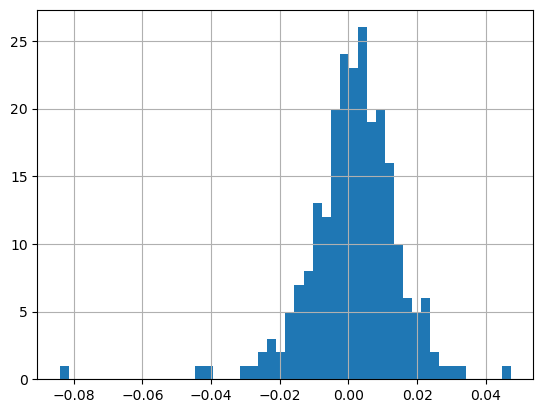

In [33]:
# Computing VaR and CVaR

portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50)
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

In [34]:
# Minimising CVaR of the portfolio

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True)

Expected annual return: 27.9%
Conditional Value at Risk: 2.82%


(0.27924848029205973, 0.028239039625405696)

In [35]:
# Constructing a portfolio with Target CVaR

ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.03)
ec.portfolio_performance(verbose=True)

Expected annual return: 32.9%
Conditional Value at Risk: 3.00%


(0.32902205807903806, 0.030000000045813435)

In [36]:
# Constructing 10000 simulated portfolios

n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.34791524 0.34350902 0.34692541 ... 0.32526035 0.3305896  0.33952736]
Sample portfolio volatilities: 0       0.208655
1       0.210086
2       0.208865
3       0.207332
4       0.220614
          ...   
9995    0.222915
9996    0.214065
9997    0.193526
9998    0.205137
9999    0.206070
Length: 10000, dtype: float64


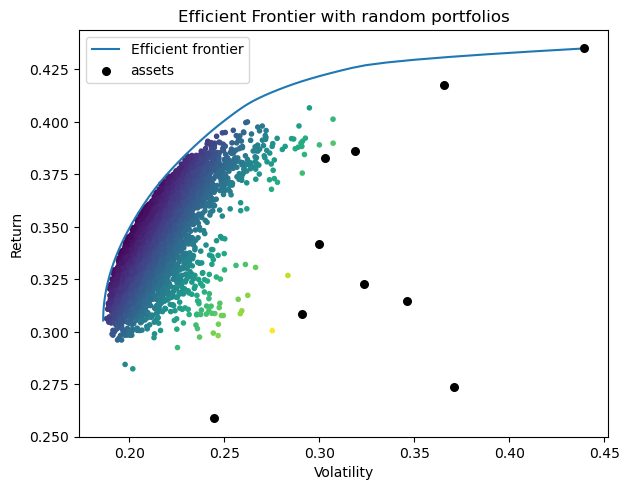

In [37]:
# Plotting the efficient frontier

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Plot random portfolios
plt.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
plt.title("Efficient Frontier with random portfolios")
plt.legend()
plt.show()